# Descripción del Taller Pandas

Actividades a desarrollar:

1. Diga qué índices serían pertienentes tener y pongalos.

2. Elimine registros que tengan NA en la columna "pm2.5"

3. Realice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados.

4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.


## Inicio: Lectura de datos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
dfBeijing=pd.read_csv('~/Desktop/Diplomado UNAL/PRSA_data_2010.1.1-2014.12.31.csv', delimiter=",", low_memory=False, index_col=False,keep_date_col=True)
dfBeijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## Paso 1: Indices

In [14]:
dfBeijing.set_index('No')

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## Paso 2: Eliminar valores faltantes (NaN) en la variable PM2.5

In [15]:
dfBeijing.dropna(subset = ["pm2.5"], inplace=True)
dfBeijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## Paso 3: Describe() por año de todas la variables

In [16]:
dfBeijing.describe(include='all')

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757,41757.000000,41757.000000,41757.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14573,NaN,NaN,NaN
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,NaN,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,NaN,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,NaN,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,NaN,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,NaN,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,NaN,21.910000,0.000000,0.000000


In [17]:
dfBeijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


<AxesSubplot:>

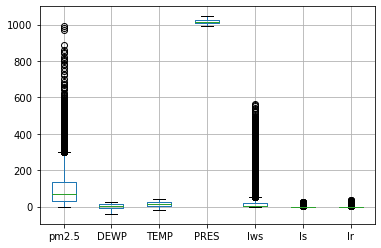

In [18]:
dfBeijing.boxplot(['pm2.5', 'DEWP', 'TEMP', 'PRES','Iws','Is','Ir' ])

## Paso 4: Gráfico de dispersión de PM2.5 y TEMP

<AxesSubplot:xlabel='TEMP', ylabel='pm2.5'>

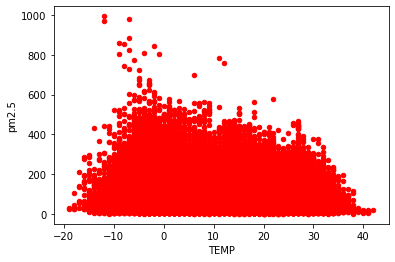

In [19]:
dfBeijing.plot.scatter('TEMP','pm2.5', c='red')

Del gráfico se interpreta que temperaturas bajo 0 incrementan el valor de pm2.5

## Paso 5: Calculo de P(pm2.5 > 120) 

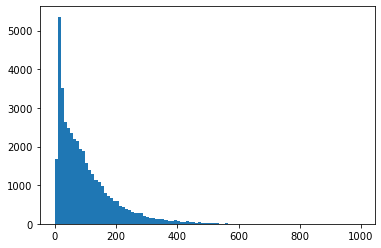

In [20]:
plt.hist(dfBeijing['pm2.5'], bins=100)
plt.show()

In [21]:
M120=dfBeijing.loc[dfBeijing['pm2.5']>120]
M120['pm2.5'].shape

(12483,)

In [22]:
P120=12483/41757
P120

0.2989438896472448

## Paso 6: Media de pm2.5 por año

In [23]:
df=pd.pivot_table(dfBeijing, values='pm2.5',
                       index=['year'],
                      aggfunc='mean')
df.sort_values(by='pm2.5', ascending=True)

,pm2.5
year,
2012,90.545871
2014,97.734557
2011,99.071340
2013,101.712376
2010,104.045730


Gracias!!